# Gradient Boosted Models

In [18]:
cimport numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from sklearn.model_selection import train_test_split
from sksurv.datasets import load_breast_cancer
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

In [19]:
import pandas as pd
df = pd.read_csv('miRNAexpression_clinicle.csv')
df.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b,Diagnosisage,LymphNodeStage,Survival,SurvivalStatus
0,12.5118,13.5062,12.5058,13.1423,9.4597,9.1296,11.3277,4.5361,13.1852,8.7630,...,7.0844,4.4115,3.2474,5.8341,7.7704,14.8284,66.0,2.0,3.353388,0
1,12.8151,13.8253,12.8277,13.0250,8.0617,9.6969,9.6906,4.6816,14.1684,9.4817,...,9.5068,1.5428,5.5523,6.5335,5.1035,14.0989,47.0,2.0,12.788901,1
2,13.9389,14.9395,13.9522,14.2588,8.8684,9.0935,10.8985,5.9200,14.9715,10.4961,...,8.7194,4.2529,4.5285,6.3210,4.7599,14.2215,56.0,0.0,42.344741,0
3,13.7992,14.8060,13.8097,14.8904,11.5533,9.5417,9.7590,4.8165,13.8766,9.4976,...,7.5526,2.5631,5.6962,6.5749,8.7677,13.6794,54.0,2.0,8.153335,0
4,13.6592,14.6622,13.6761,14.4914,9.4091,9.2256,9.4294,6.3407,13.8757,9.8671,...,7.6184,2.6753,4.1333,5.6403,6.3945,13.7741,58.0,0.0,23.835355,0


In [20]:
df=df.fillna(value=0)
df.isnull().sum()
df2=np.array(df)
# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(df2[:, i][df2[:, i] != -np.inf]) for i in range(df2.shape[1])]
maxs = [np.nanmax(df2[:, i][df2[:, i] != np.inf]) for i in range(df2.shape[1])]

#df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [21]:
for i in range(df.shape[1]):
    df2[:, i][df2[:, i] == -np.inf] = mins[i]
    df2[:, i][df2[:, i] == np.inf] = maxs[i]

In [22]:
df2=pd.DataFrame(df2)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,836,837,838,839,840,841,842,843,844,845
0,12.5118,13.5062,12.5058,13.1423,9.4597,9.1296,11.3277,4.5361,13.1852,8.7630,...,7.0844,4.4115,3.2474,5.8341,7.7704,14.8284,66.0,2.0,3.353388,0.0
1,12.8151,13.8253,12.8277,13.0250,8.0617,9.6969,9.6906,4.6816,14.1684,9.4817,...,9.5068,1.5428,5.5523,6.5335,5.1035,14.0989,47.0,2.0,12.788901,1.0
2,13.9389,14.9395,13.9522,14.2588,8.8684,9.0935,10.8985,5.9200,14.9715,10.4961,...,8.7194,4.2529,4.5285,6.3210,4.7599,14.2215,56.0,0.0,42.344741,0.0
3,13.7992,14.8060,13.8097,14.8904,11.5533,9.5417,9.7590,4.8165,13.8766,9.4976,...,7.5526,2.5631,5.6962,6.5749,8.7677,13.6794,54.0,2.0,8.153335,0.0
4,13.6592,14.6622,13.6761,14.4914,9.4091,9.2256,9.4294,6.3407,13.8757,9.8671,...,7.6184,2.6753,4.1333,5.6403,6.3945,13.7741,58.0,0.0,23.835355,0.0


In [23]:
Y2=df2[df2.columns[845:]].astype(bool)
Y2=pd.DataFrame(Y2)

Y3=df2[df2.columns[844]]
Y3=pd.DataFrame(Y3)

Y3=Y3.drop(Y3[Y3.columns[845:]], axis=1)
#print(Y3)
Y4=pd.concat([Y2,Y3], axis=1)
Y4


,845,844
0,False,3.353388
1,True,12.788901
2,False,42.344741
3,False,8.153335
4,False,23.835355
...,...,...
478,True,17.062827
479,True,23.605221
480,True,1.808199
481,False,17.029950


In [24]:
y = Y4.to_records(index=False)
y

rec.array([(False, 3.35338791e+00), ( True, 1.27889009e+01),
           (False, 4.23447414e+01), (False, 8.15333531e+00),
           (False, 2.38353552e+01), (False, 2.04819673e+01),
           (False, 6.55883223e+01), ( True, 5.30624322e+01),
           ( True, 1.13094651e+01), (False, 2.11723707e+01),
           ( True, 1.48272348e+01), ( True, 3.55064602e+00),
           ( True, 1.26245192e+01), (False, 2.16983923e+00),
           (False, 4.18515961e+01), (False, 1.52217510e+01),
           (False, 2.81092810e+01), (False, 2.04490910e+01),
           (False, 6.47664135e+00), (False, 2.79120229e+01),
           (False, 1.15395996e+01), (False, 6.83828122e+00),
           ( True, 3.15612980e+00), (False, 1.44655949e+01),
           ( True, 7.82457179e+00), ( True, 2.26846829e+00),
           ( True, 8.74510964e+00), ( True, 7.89032449e+00),
           (False, 2.04819673e+01), (False, 1.64052997e+01),
           (False, 6.14787783e+00), (False, 2.79448992e+00),
           (False, 2.242

In [25]:
#new_df=df.drop(labels=[ 'Survival',  'SurvivalStatus' ], axis=1)
new_df=df2.drop((df2[df2.columns[844:]]), axis=1)
count = np.isinf(new_df).values.sum()
count
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,834,835,836,837,838,839,840,841,842,843
0,12.5118,13.5062,12.5058,13.1423,9.4597,9.1296,11.3277,4.5361,13.1852,8.7630,...,2.4290,0.0000,7.0844,4.4115,3.2474,5.8341,7.7704,14.8284,66.0,2.0
1,12.8151,13.8253,12.8277,13.0250,8.0617,9.6969,9.6906,4.6816,14.1684,9.4817,...,4.3008,0.2781,9.5068,1.5428,5.5523,6.5335,5.1035,14.0989,47.0,2.0
2,13.9389,14.9395,13.9522,14.2588,8.8684,9.0935,10.8985,5.9200,14.9715,10.4961,...,4.1204,0.0000,8.7194,4.2529,4.5285,6.3210,4.7599,14.2215,56.0,0.0
3,13.7992,14.8060,13.8097,14.8904,11.5533,9.5417,9.7590,4.8165,13.8766,9.4976,...,3.2618,0.0000,7.5526,2.5631,5.6962,6.5749,8.7677,13.6794,54.0,2.0
4,13.6592,14.6622,13.6761,14.4914,9.4091,9.2256,9.4294,6.3407,13.8757,9.8671,...,4.7225,0.0000,7.6184,2.6753,4.1333,5.6403,6.3945,13.7741,58.0,0.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.25)

In [27]:
est_cph_tree = GradientBoostingSurvivalAnalysis(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
est_cph_tree.fit(X_train, y_train)
cindex = est_cph_tree.score(X_test, y_test)
print(round(cindex, 3))

0.615


In [31]:
scores_cph_tree = {}

est_cph_tree = GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=1, random_state=0)
for i in range(1, 31):
    n_estimators = i * 5
    est_cph_tree.set_params(n_estimators=n_estimators)
    est_cph_tree.fit(X_train, y_train)
    scores_cph_tree[n_estimators] = est_cph_tree.score(X_test, y_test)

In [32]:
scores_cph_tree

{5: 0.5972074468085107,
 10: 0.6054521276595745,
 15: 0.5998670212765957,
 20: 0.5954787234042553,
 25: 0.605186170212766,
 30: 0.6115691489361702,
 35: 0.6142287234042553,
 40: 0.6007978723404256,
 45: 0.5989361702127659,
 50: 0.5973404255319149,
 55: 0.6013297872340425,
 60: 0.5986702127659574,
 65: 0.6013297872340425,
 70: 0.6148936170212767,
 75: 0.6180851063829788,
 80: 0.6117021276595744,
 85: 0.6015957446808511,
 90: 0.6172872340425531,
 95: 0.6125,
 100: 0.6148936170212767,
 105: 0.6148936170212767,
 110: 0.6194148936170213,
 115: 0.6226063829787234,
 120: 0.622872340425532,
 125: 0.6316489361702128,
 130: 0.6279255319148936,
 135: 0.6295212765957446,
 140: 0.6236702127659575,
 145: 0.6199468085106383,
 150: 0.6223404255319149}

In [33]:
scores_cph_ls = {}

est_cph_ls = ComponentwiseGradientBoostingSurvivalAnalysis(learning_rate=1.0, random_state=0)
for i in range(1, 31):
    n_estimators = i * 10
    est_cph_ls.set_params(n_estimators=n_estimators)
    est_cph_ls.fit(X_train, y_train)
    scores_cph_ls[n_estimators] = est_cph_ls.score(X_test, y_test)

In [37]:
from sklearn.feature_selection import chi2 

In [ ]:
est_cph_ls.score(X_test,y_test)

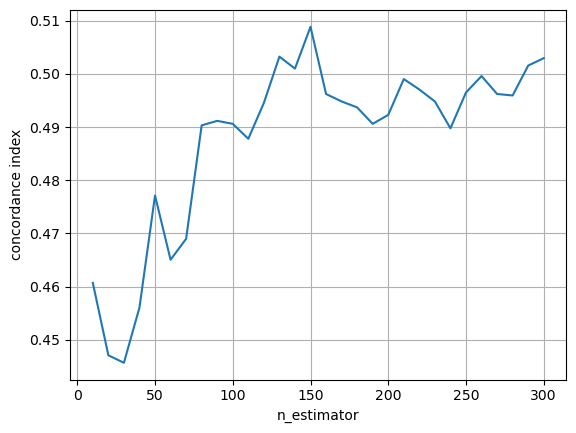

In [40]:
x, y = zip(*scores_cph_ls.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)

# The coefficients of the model 

In [41]:
coef = pd.Series(est_cph_ls.coef_, ["Intercept"] + new_df.columns.tolist())

print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

Number of non-zero coefficients: 124


727    6.226086
812    6.113763
676    5.784613
317   -5.252269
310    5.011790
         ...   
229    0.051052
523   -0.037442
643    0.036146
154    0.032586
216    0.023229
Length: 124, dtype: float64

# Accelerated Failure Time Model

In [43]:
n_estimators = [i * 5 for i in range(1, 21)]

estimators = {
    "no regularization": GradientBoostingSurvivalAnalysis(learning_rate=1.0, max_depth=1, random_state=0),
    "learning rate": GradientBoostingSurvivalAnalysis(learning_rate=0.1, max_depth=1, random_state=0),
    "dropout": GradientBoostingSurvivalAnalysis(learning_rate=1.0, dropout_rate=0.1, max_depth=1, random_state=0),
    "subsample": GradientBoostingSurvivalAnalysis(learning_rate=1.0, subsample=0.5, max_depth=1, random_state=0),
}

scores_reg = {k: [] for k in estimators.keys()}
for n in n_estimators:
    for name, est in estimators.items():
        est.set_params(n_estimators=n)
        est.fit(X_train, y_train)
        cindex = est.score(X_test, y_test)
        scores_reg[name].append(cindex)

scores_reg = pd.DataFrame(scores_reg, index=n_estimators)

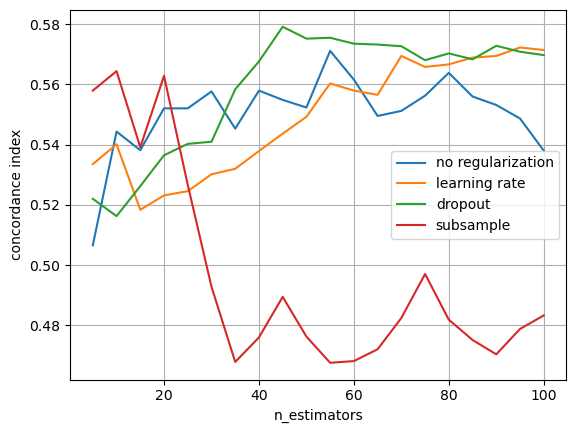

In [44]:
ax = scores_reg.plot(xlabel="n_estimators", ylabel="concordance index")
ax.grid(True)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from sklearn.model_selection import train_test_split
from sksurv.datasets import load_breast_cancer
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

In [44]:
import pandas as pd
df = pd.read_csv('miRNA12.csv')
df.head()

,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,hsa-miR-96-3p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p,OS_days,PFS_event
0,0.2372,6.8868,16.0754,4.3936,12.1407,1.8447,10.3022,7.8107,12.3262,3.0425,...,0.0000,6.2253,1.7328,11.3658,1.6114,10.2204,6.5796,11.5166,1425,0
1,0.5782,6.1067,15.5682,5.1750,12.1485,1.9848,10.0580,8.4284,12.1403,3.7885,...,0.3179,7.5392,0.7987,10.9484,1.7406,10.0831,6.0859,11.3148,1418,0
2,0.4842,6.9693,17.2549,6.7587,14.3658,3.1662,12.3041,9.3820,12.5467,3.3085,...,0.0000,5.2260,2.3565,10.6058,2.6288,10.5558,6.3523,10.6756,0,0
3,0.2998,6.0993,15.4141,4.6114,12.6769,1.3878,9.7117,7.3923,11.3293,3.8706,...,1.6224,8.6580,1.6755,10.4907,1.8240,9.9885,7.7412,12.8671,422,0
4,0.5061,6.3537,15.9168,5.0323,12.9183,1.7273,10.8604,8.2581,12.1654,3.8630,...,0.2751,6.2319,1.5315,11.4967,2.6199,11.2061,6.5427,11.5900,419,1


In [45]:
df=df.fillna(value=0)
df.isnull().sum()
df2=np.array(df)
# find min and max values for each column, ignoring nan, -inf, and inf
mins = [np.nanmin(df2[:, i][df2[:, i] != -np.inf]) for i in range(df2.shape[1])]
maxs = [np.nanmax(df2[:, i][df2[:, i] != np.inf]) for i in range(df2.shape[1])]

#df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [46]:
for i in range(df.shape[1]):
    df2[:, i][df2[:, i] == -np.inf] = mins[i]
    df2[:, i][df2[:, i] == np.inf] = maxs[i]

In [47]:
df2=pd.DataFrame(df2)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,2574,2575,2576,2577,2578,2579,2580,2581,2582,2583
0,0.2372,6.8868,16.0754,4.3936,12.1407,1.8447,10.3022,7.8107,12.3262,3.0425,...,0.0000,6.2253,1.7328,11.3658,1.6114,10.2204,6.5796,11.5166,1425.0,0.0
1,0.5782,6.1067,15.5682,5.1750,12.1485,1.9848,10.0580,8.4284,12.1403,3.7885,...,0.3179,7.5392,0.7987,10.9484,1.7406,10.0831,6.0859,11.3148,1418.0,0.0
2,0.4842,6.9693,17.2549,6.7587,14.3658,3.1662,12.3041,9.3820,12.5467,3.3085,...,0.0000,5.2260,2.3565,10.6058,2.6288,10.5558,6.3523,10.6756,0.0,0.0
3,0.2998,6.0993,15.4141,4.6114,12.6769,1.3878,9.7117,7.3923,11.3293,3.8706,...,1.6224,8.6580,1.6755,10.4907,1.8240,9.9885,7.7412,12.8671,422.0,0.0
4,0.5061,6.3537,15.9168,5.0323,12.9183,1.7273,10.8604,8.2581,12.1654,3.8630,...,0.2751,6.2319,1.5315,11.4967,2.6199,11.2061,6.5427,11.5900,419.0,1.0


In [48]:
Y2=df2[df2.columns[2583:]].astype(bool)
Y2=pd.DataFrame(Y2)

Y3=df2[df2.columns[2582]]
Y3=pd.DataFrame(Y3)

Y3=Y3.drop(Y3[Y3.columns[2583:]], axis=1)
#print(Y3)
Y4=pd.concat([Y2,Y3], axis=1)
Y4


,2583,2582
0,False,1425.0
1,False,1418.0
2,False,0.0
3,False,422.0
4,True,419.0
...,...,...
105,False,888.0
106,False,30.0
107,False,1111.0
108,False,1106.0


In [49]:
y = Y4.to_records(index=False)
y

rec.array([(False, 1425.), (False, 1418.), (False,    0.), (False,  422.),
           ( True,  419.), (False,  353.), (False,    0.), (False,  445.),
           (False,    7.), (False,    7.), (False, 1837.), (False,  577.),
           ( True, 1805.), (False, 1790.), ( True, 1703.), ( True,  889.),
           (False, 1794.), (False, 1802.), (False,  578.), (False, 1157.),
           (False,  606.), (False,  141.), ( True,  162.), (False, 1916.),
           (False,   38.), ( True, 1801.), (False,   23.), (False,   73.),
           (False, 1435.), (False, 1595.), ( True,  717.), (False, 1617.),
           ( True, 1046.), (False,  594.), (False, 1799.), (False,  671.),
           (False, 1133.), ( True,  931.), ( True, 1376.), (False,  627.),
           (False, 1013.), ( True,  447.), ( True,  842.), (False,  376.),
           (False,  308.), (False,  355.), (False, 1721.), (False,    0.),
           (False,  668.), (False,   49.), (False, 1832.), ( True, 1848.),
           (False,   60.)

In [50]:
#new_df=df.drop(labels=[ 'Survival',  'SurvivalStatus' ], axis=1)
new_df=df2.drop((df2[df2.columns[2582:]]), axis=1)
count = np.isinf(new_df).values.sum()
count
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2572,2573,2574,2575,2576,2577,2578,2579,2580,2581
0,0.2372,6.8868,16.0754,4.3936,12.1407,1.8447,10.3022,7.8107,12.3262,3.0425,...,0.0000,0.0,0.0000,6.2253,1.7328,11.3658,1.6114,10.2204,6.5796,11.5166
1,0.5782,6.1067,15.5682,5.1750,12.1485,1.9848,10.0580,8.4284,12.1403,3.7885,...,0.0000,0.0,0.3179,7.5392,0.7987,10.9484,1.7406,10.0831,6.0859,11.3148
2,0.4842,6.9693,17.2549,6.7587,14.3658,3.1662,12.3041,9.3820,12.5467,3.3085,...,0.0000,0.0,0.0000,5.2260,2.3565,10.6058,2.6288,10.5558,6.3523,10.6756
3,0.2998,6.0993,15.4141,4.6114,12.6769,1.3878,9.7117,7.3923,11.3293,3.8706,...,0.2998,0.0,1.6224,8.6580,1.6755,10.4907,1.8240,9.9885,7.7412,12.8671
4,0.5061,6.3537,15.9168,5.0323,12.9183,1.7273,10.8604,8.2581,12.1654,3.8630,...,0.0000,0.0,0.2751,6.2319,1.5315,11.4967,2.6199,11.2061,6.5427,11.5900


In [51]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.25)

In [52]:
est_cph_tree = GradientBoostingSurvivalAnalysis(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
est_cph_tree.fit(X_train, y_train)
cindex = est_cph_tree.score(X_test, y_test)
print(round(cindex, 3))

0.728


In [54]:
scores_cph_ls = {}

est_cph_ls = ComponentwiseGradientBoostingSurvivalAnalysis(learning_rate=1.0, random_state=0)
for i in range(1, 31):
    n_estimators = i * 10
    est_cph_ls.set_params(n_estimators=n_estimators)
    est_cph_ls.fit(X_train, y_train)
    scores_cph_ls[n_estimators] = est_cph_ls.score(X_test, y_test)

In [55]:
from sklearn.feature_selection import chi2 

In [56]:
est_cph_ls.score(X_test,y_test)

0.8689320388349514

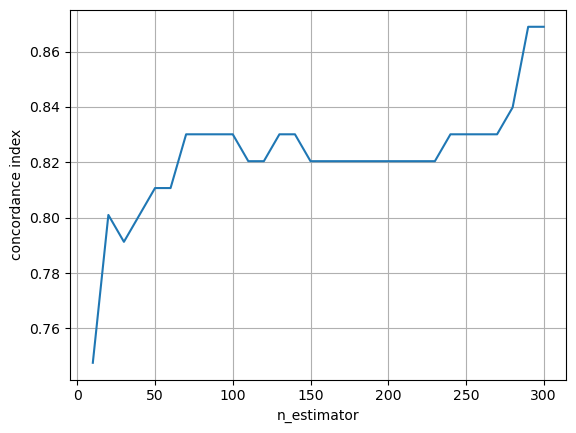

In [57]:
x, y = zip(*scores_cph_ls.items())
plt.plot(x, y)
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)